In [13]:
import torch, torchvision
import torchvision.transforms as T
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import os

In [14]:
# Load pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [15]:
COCO_INSTANCES_CATEGORY_NAMES = ['',
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat',
    'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
    'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
    'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
    'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]

In [16]:
# Example usage
img_path = '/content/DOG-GERMAN.webp'

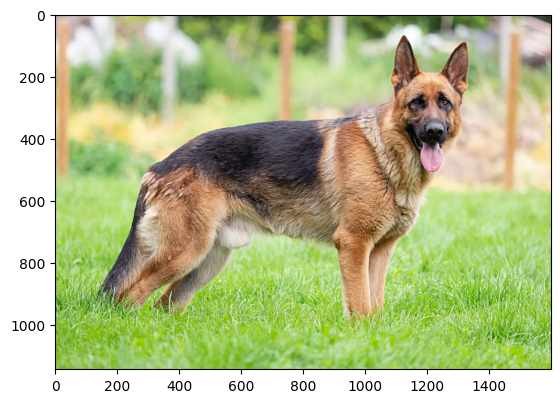

In [17]:
img = plt.imread(img_path)
plt.imshow(img)

In [18]:
# # Function to get a prediction
# def get_prediction(img_path,threshold):
#   img = Image.open(img_path)
#   transform = T.Compose([T.ToTensor()])
#   img = transform(img)
#   with torch.no_grad():
#     pred = model([img])
#   pred_class = [COCO_INSTANCES_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] #Get
#   pred_boxes = [[(i[0],i[1]),(i[2],i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
#   pred_score = list(pred[0]['scores'].detach().numpy())
#   pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
#   pred_boxes = pred_boxes[:pred_t+1]
#   pred_class = pred_class[:pred_t+2]
#   return pred_boxes, pred_class

In [19]:
# Function to get a prediction
def get_prediction(img_path, threshold):
  img = Image.open(img_path)
  transform = T.Compose([T.ToTensor()])
  img_tensor = transform(img)
  with torch.no_grad():
    pred = model([img_tensor])
  pred_class = [COCO_INSTANCES_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]

  # Get the prediction score
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]

  # Bounding Boxes
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(i) for i in pred_score if i > threshold]
  # Find the index of the last element to include based on threshold
  if pred_t:
    last_index = pred_t[-1] + 1
  else:
    last_index = 0 # Handle the case where no predictions meet the threshold
  pred_boxes = pred_boxes[:last_index]
  pred_classes = pred_class[:last_index]
  return pred_boxes, pred_classes

In [20]:
boxes, category = get_prediction(img_path, 0.5)

In [21]:
category

['dog']

In [22]:
# Function to draw bounding boxes
def draw_boxes(img_path, threshold=0.5):
  boxes, pred_cls = get_prediction(img_path, threshold)
  img = Image.open(img_path)
  draw = ImageDraw.Draw(img)
  for box, cls in zip(boxes, pred_cls):
    draw.rectangle(box, outline='red', width=3) #draw bounding boxes
    draw.text(box[0], cls, fill='red', stroke_width = 5) #draw text
  return img # display the image

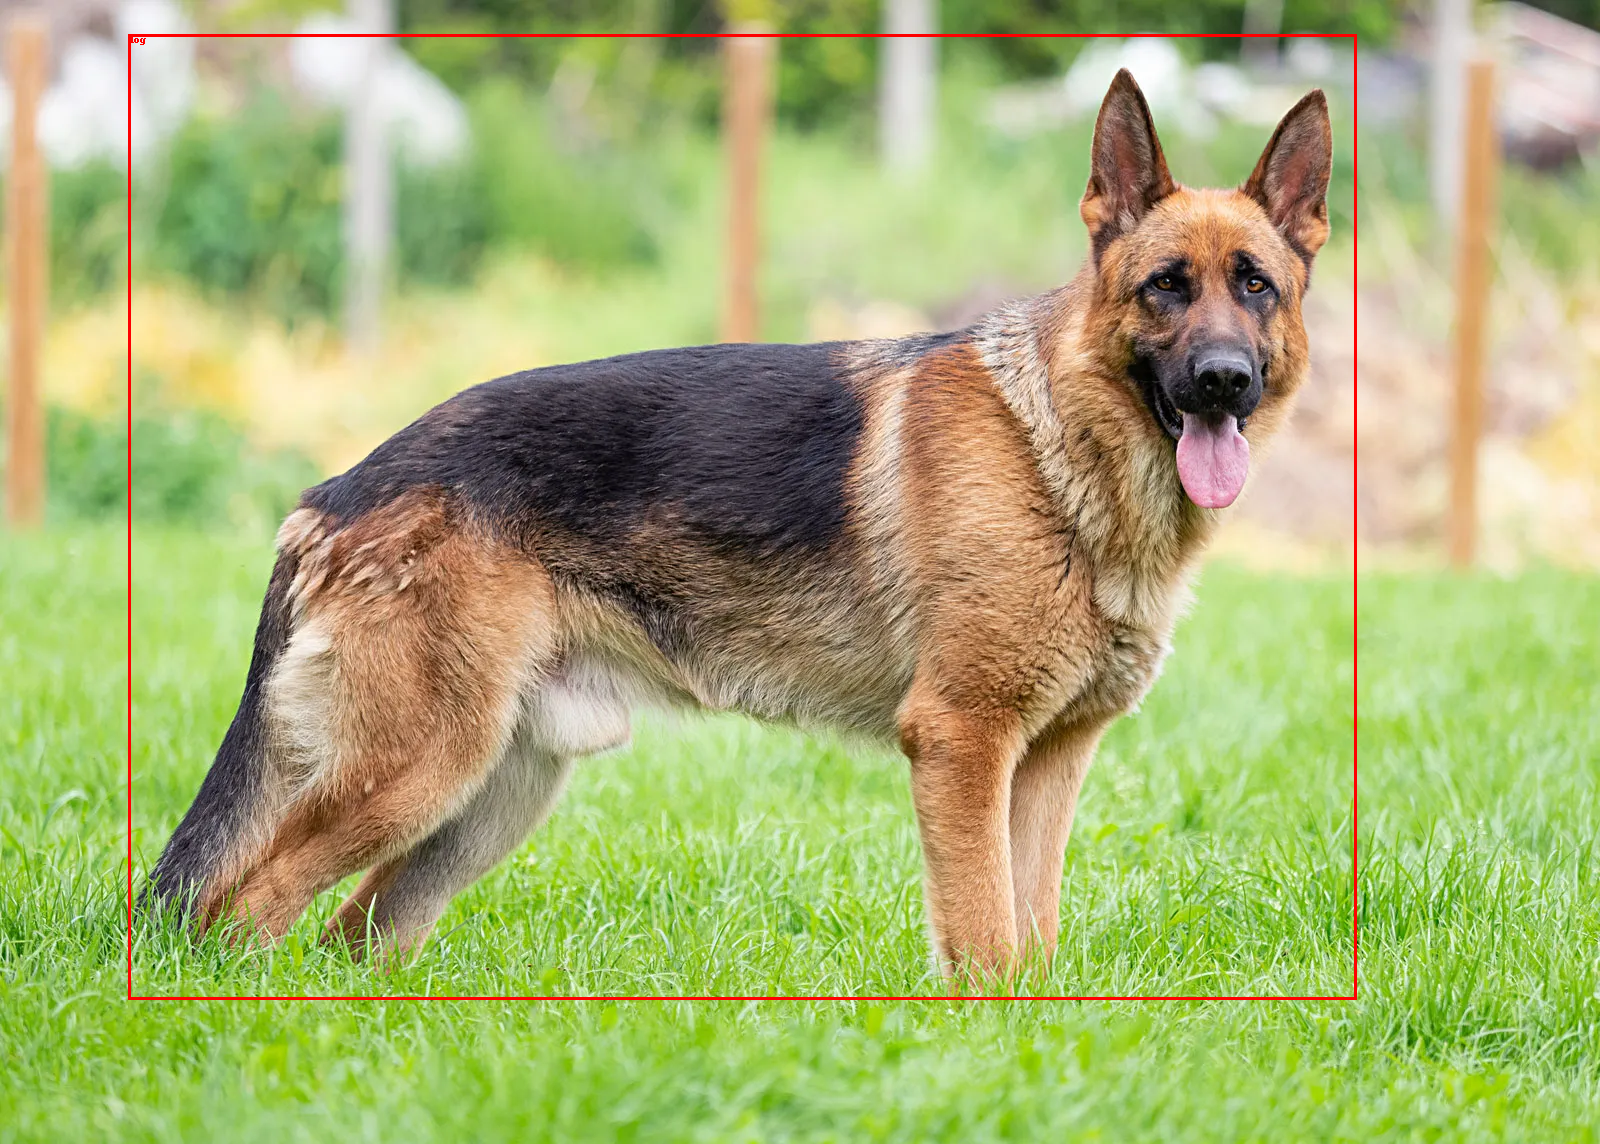

In [23]:
draw_boxes(img_path, threshold=0.5)